### This file locates the datapoints situated near the edges of the clusters.
#### Reason: The outer points are the most crucial in the training dataset. In the case when the training dataponts are too many to include all, we should first find these edge points and make sure they are included in the training data!

In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Load

In [2]:
def load_data(path, max_rows = 300000):
    """
    Load the training data
    
    Arguments:  rows -> Maximum number of rows to load from the dataset.
    
    Return:     * Pandas dataframe, duplicates removed and reshuffled along the vertical axis. 

    """
    df = pd.read_csv(path, header=None, sep=',')
    df.columns = ['B1', 'C1', 'A2', 'B2', 'C2', 'ma_B1', 'ma_C1', 'ma_A2', 'ma_B2', 'ma_C2', 'labels_y']
    df = df.drop_duplicates()
    df = df.sample(frac = 1)
    df = df.reset_index(drop=True)
    labels_y = df['labels_y']
    df = df.drop(columns=['labels_y'])
#     df = df.drop(columns=[ 'A2', 'B2', 'C2', 'ma_B1', 'ma_C1', 'ma_A2', 'ma_B2', 'ma_C2','labels_y']) # delete this line

    return df[:max_rows], labels_y[:max_rows]

In [3]:
# file_path  = r'G:\DATAcomplete3.TXT'
file_path  = r'..\..\DATA\newerrrr_DATA\DELETE_THIS\my_training_set.txt'
# train_data, labels_y = load_data(file_path, max_rows = 325000)
train_data, labels_y = load_data(file_path, max_rows = 3000000) # delete this line

In [4]:
X = np.r_[train_data]
labels_y = np.r_[labels_y].reshape((-1,1))

In [5]:
labels_y.shape

(3000000, 1)

# Plot

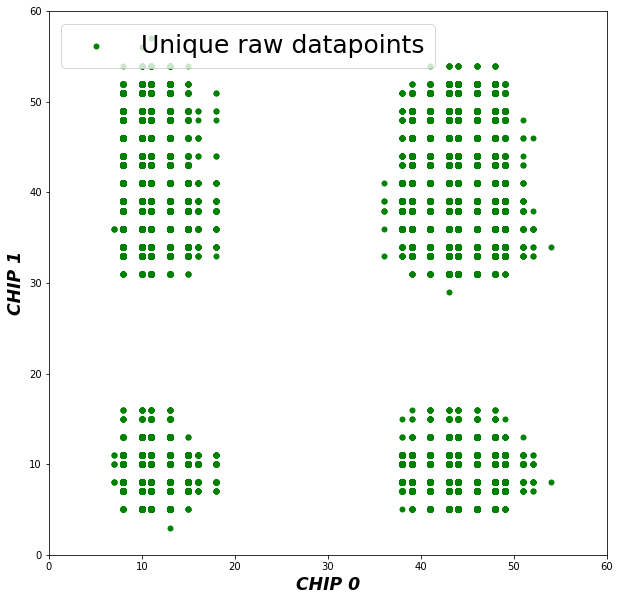

In [6]:
plt.figure(figsize=(10,10))

column1 = 0
column2 = 1

data = plt.scatter(X[:, column1], X[:, column2], c='green', s=25, edgecolors='green')
# HT = plt.scatter(X_outliers[:, column1], X_outliers[:, column2], c='red', s=1, edgecolors='red')

plt.axis('tight')
plt.xlim((0, 60))
plt.ylim((0, 60))

plt.legend([data], ["Unique raw datapoints"], loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=25))

# plt.xlabel(
#     "Errors train: %d/%d ; "
#     "Errors novel regular: %d/%d ; "
#     "Errors novel abnormal: %d/%d"
#     % (n_error_train, n_train_rows ,n_error_test, n_test_rows, n_error_outliers, n_outliers_rows))
plt.xlabel("CHIP {}".format(column1), fontsize='xx-large', fontstyle='oblique', fontweight='bold')
plt.ylabel("CHIP {}".format(column2), fontsize='xx-large', fontstyle='oblique', fontweight='bold')

plt.show()

# Find edge points ----------------------------------------------------

In [7]:
def find_edge_points(dataframe):
    X = dataframe
    clustering = DBSCAN(eps=5, min_samples=60).fit(X)
    labels = clustering.labels_                         # cluster group of every point
    core_ind = clustering.core_sample_indices_          # indices of core points
    arr1 = np.arange(len(X))                            # indices of all points
    arr2 = labels!= -1                                  # indices of core and edge points
    arr3 = np.setdiff1d(arr1,core_ind)                  # indices of edge and noise points
    
    # Edge indices
    edge_ind = [idx for idx in arr3 if clustering.labels_[idx]!= -1] # edge_ind = [idx for idx in arr3 if arr2[idx]==True]
#     print("edge", len(edge_ind))

    # Noise indices
    noise_ind = [idx for idx in arr3 if clustering.labels_[idx] == -1]
#     print("noise", len(noise_ind))
    
    edge_ind = np.array(edge_ind).reshape((-1,1))
    noise_ind = np.array(noise_ind).reshape((-1,1))
    
    return edge_ind, noise_ind



In [8]:
all_edges = []
all_noises = []
window =200000
for i in range(0, 15):
    dataset = X[i*window:(i+1)*window]
    edge_ind, noise_ind = find_edge_points(dataset)
    edge_ind = edge_ind + i
    noise_ind = noise_ind + i
    
    all_edges = np.append(all_edges, edge_ind).reshape((-1,1))
    all_noises = np.append(all_noises, noise_ind).reshape((-1,1))
    print(i*window, (i+1)*window, all_edges.shape , edge_ind.shape)
    
print("Done!")

0 200000 (6696, 1) (6696, 1)
200000 400000 (13391, 1) (6695, 1)
400000 600000 (20089, 1) (6698, 1)
600000 800000 (26772, 1) (6683, 1)
800000 1000000 (33502, 1) (6730, 1)
1000000 1200000 (40299, 1) (6797, 1)
1200000 1400000 (47074, 1) (6775, 1)
1400000 1600000 (53734, 1) (6660, 1)
1600000 1800000 (60430, 1) (6696, 1)
1800000 2000000 (67205, 1) (6775, 1)
2000000 2200000 (73978, 1) (6773, 1)
2200000 2400000 (80808, 1) (6830, 1)
2400000 2600000 (87561, 1) (6753, 1)
2600000 2800000 (94297, 1) (6736, 1)
2800000 3000000 (101022, 1) (6725, 1)
Done!


In [28]:
all_edges.astype(int).reshape((-1))

array([     1,     21,    112, ..., 199993, 199995, 199998])

In [26]:
np.savetxt('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\all_edge_indices.txt', all_edges.reshape((1,-1)), fmt='%1.i', delimiter=' ')
np.savetxt('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\all_noise_indices.txt', all_noises.reshape((1,-1)), fmt='%1.i', delimiter=' ')

In [24]:
X = np.r_[train_data]
np.savetxt('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\all_edges.txt', X[all_edges.astype(int).reshape((-1))],fmt='%7.2f', delimiter=',')
np.savetxt('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\all_noises.txt', X[all_noises.astype(int).reshape((-1))], fmt='%7.2f', delimiter=',')

In [ ]:
# clustering = DBSCAN(eps=5, min_samples=60).fit(X)

In [ ]:
clustering

In [ ]:
labels = clustering.labels_

np.unique(labels)

In [ ]:
# core indices
core_ind = clustering.core_sample_indices_
# core_ind

In [ ]:
clustering.components_

In [ ]:
X[core_ind].shape

In [ ]:
# All indices
arr1 = np.arange(len(X))
# arr1
len(X)

In [ ]:
# Core and edge points
arr2 = labels!= -1

In [ ]:
# Edge and Noise indices
arr3 = np.setdiff1d(arr1,core_ind)
len(arr3)

In [ ]:
# Edge indices
edge_ind = [idx for idx in arr3 if clustering.labels_[idx]!= -1] # edge_ind = [idx for idx in arr3 if arr2[idx]==True]
print(len(edge_ind))

# Noise indices
noise_ind = [idx for idx in arr3 if clustering.labels_[idx] == -1]

print(len(noise_ind))

In [ ]:
X_edge = X[edge_ind]
labels_y_edge = labels_y[edge_ind]

X_noise = X[noise_ind]

In [ ]:
plt.figure(figsize=(10,10))

column1 = 0
column2 = 1

data = plt.scatter(X[:, column1], X[:, column2], c='green', s=55, edgecolors='green')
edge_data = plt.scatter(X_edge[:, column1], X_edge[:, column2], c='orange', s=35, edgecolors='orange')
noise_data = plt.scatter(X_noise[:, column1], X_noise[:, column2], c='red', s=35, edgecolors='red', marker='x')
# HT = plt.scatter(X_outliers[:, column1], X_outliers[:, column2], c='red', s=1, edgecolors='red')

plt.axis('tight')
plt.xlim((0, 60))
plt.ylim((0, 70))

plt.legend([data, edge_data, noise_data], ["All data", "Edge data", "Noise data"], loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=25))

plt.xlabel("CHIP {}\n all data:  {},  edge points:  {},  noise points:  {}".format(column1, len(X), len(edge_ind), len(noise_ind)), fontsize='xx-large', fontstyle='oblique', fontweight='bold')
plt.ylabel("CHIP {}".format(column2), fontsize='xx-large', fontstyle='oblique', fontweight='bold')

plt.show()

In [ ]:
print(X_edge.shape)
X_edge = np.append(X_edge,labels_y_edge, axis=1)
X_edge

In [ ]:
# np.savetxt('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\Edge_points.txt', X_edge, fmt='%6.2f', delimiter=',')